In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt






In [27]:
def compute_svd(A):
    AtA = (A.T@A)
    eigvals, eigvecs = np.linalg.eig(AtA)
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    singular_values = np.sqrt(eigvals)
    
    U = np.zeros((A.shape[0], A.shape[0]), dtype=float)
    for i in range(len(singular_values)):
        U[:, i] = (A@eigvecs[:, i]) / singular_values[i]

    S = np.zeros((U.shape[0], eigvecs.shape[1]), dtype=float)
    for i in range(len(singular_values)):
        S[i, i] = singular_values[i]

    return U, S, eigvecs.T


In [28]:
# Load the image
img = Image.open("anime.jpg").convert('L')
imgmat = np.array(img, dtype=float)

# Normalize the image
imgmat /= 255.0  # Normalize to [0, 1] range

In [29]:
# Perform SVD
U, S, Vt = compute_svd(imgmat)

# Choose k for reconstruction
k = 100 # Adjust this value as needed

# Reconstruct the image
img_reconstructed = (U[:, :k]@(S[:k, :k]@ Vt[:k, :]))

# Rescale to original range [0, 255]
img_reconstructed *= 255.0
img_reconstructed = np.clip(img_reconstructed, 0, 255)  # Ensure values are valid
img_reconstructed = img_reconstructed.astype(np.uint8)  # Convert back to uint8




In [30]:
total_variance = np.sum(S**2) #Total sum of squared singular values

variance_ratios = []

for i in range(5, 220, 20): #220 should be minimum of size of img
    # Calculate the variance captured by the first i singular values
    captured_variance = np.sum(S[:i]**2)  # Sum of squared singular values
    variance_ratio = captured_variance / total_variance  # Proportion of total variance
    variance_ratios.append(variance_ratio)

In [31]:
variance_ratios

[0.9513741335533076,
 0.9796702836838673,
 0.9882695751917316,
 0.9930022021444203,
 0.9959029938244358,
 0.9977199673834515,
 0.9988209672989592,
 0.9994439875515596,
 0.9997816191519807,
 0.9999371706949381,
 0.9999924232641153]

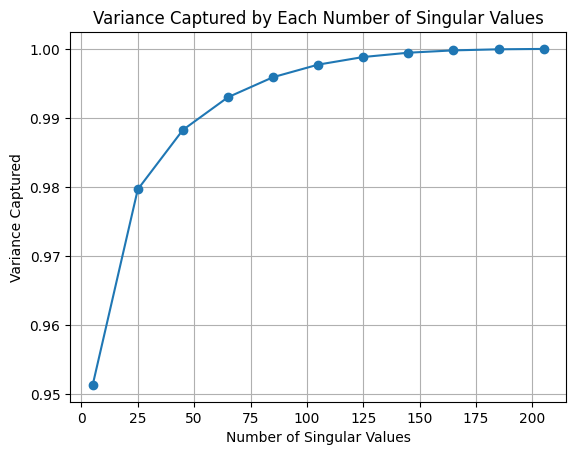

In [32]:
plt.plot(range(5, 220, 20), variance_ratios, marker='o')
plt.xlabel('Number of Singular Values')
plt.ylabel('Variance Captured')
plt.title('Variance Captured by Each Number of Singular Values')
plt.grid(True)
plt.show()

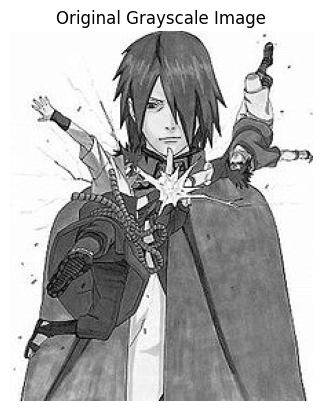

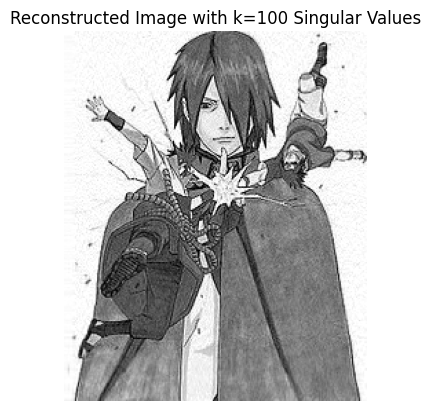

In [37]:
# Display the original and reconstructed images


plt.imshow(imgmat, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.show()
plt.imshow(img_reconstructed, cmap='gray')
plt.title(f"Reconstructed Image with k={k} Singular Values")
plt.axis('off')

plt.show()